<a href="https://colab.research.google.com/github/khemthung/MADT8101-Customer-analytics/blob/main/Ecommerce_churn_scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ecommerce churn scoring

In [1]:
## Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Geting file from github "Customertravel.csv"
github_url = 'https://raw.githubusercontent.com/khemthung/MADT8101-Customer-analytics/main/Homework%2004%20-%20Churn%20%26%20Campaign%20Scoring/raw_data/E%20Commerce%20Dataset.csv'

df = pd.read_csv(github_url)

## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [4]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [5]:
df.tail()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169


In [6]:
#Check na with .isna()
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [7]:
# clean na
df['Tenure'].fillna(df.Tenure.median(), inplace=True)
df['WarehouseToHome'].fillna(df.WarehouseToHome.median(), inplace=True)
df['HourSpendOnApp'].fillna(df.HourSpendOnApp.median(), inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(round(df.OrderAmountHikeFromlastYear.mean()), inplace=True)
df['CouponUsed'].fillna(df.CouponUsed.median(), inplace=True)
df['OrderCount'].fillna(df.OrderCount.median(), inplace=True)
df['DaySinceLastOrder'].fillna(df.DaySinceLastOrder.median(), inplace=True)

In [8]:
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

## Data Preparation

In [9]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [10]:
# Set customer_id as index and drop category data out

# Set 'customer_id' as the index & droped it out
df.set_index('CustomerID', inplace=True)


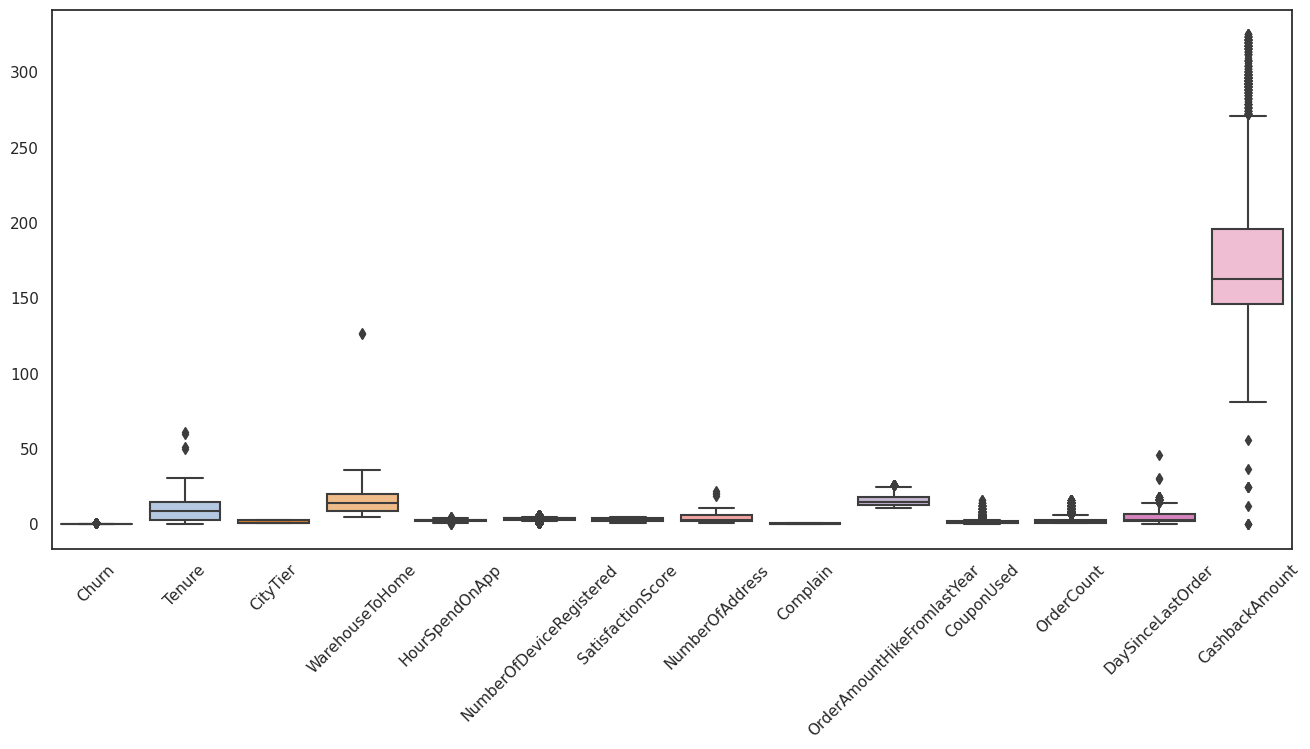

In [11]:
# Check Outliers

sns.set(style="white", palette="tab20")
fig, ax = plt.subplots(figsize=(16,7))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [12]:
#Use a quantile based flooring method to treat outliers

#Define cate data just in case
cat = df.select_dtypes(include='object').columns

#Select only numerical type columns
num = list(df.select_dtypes(exclude='object').columns)
num.remove('Churn')

for cols in num:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # Apply flooring to values below the lower bound
    df.loc[df[cols] < lower_bound, cols] = lower_bound

    # Apply capping to values above the upper bound
    df.loc[df[cols] > upper_bound, cols] = upper_bound

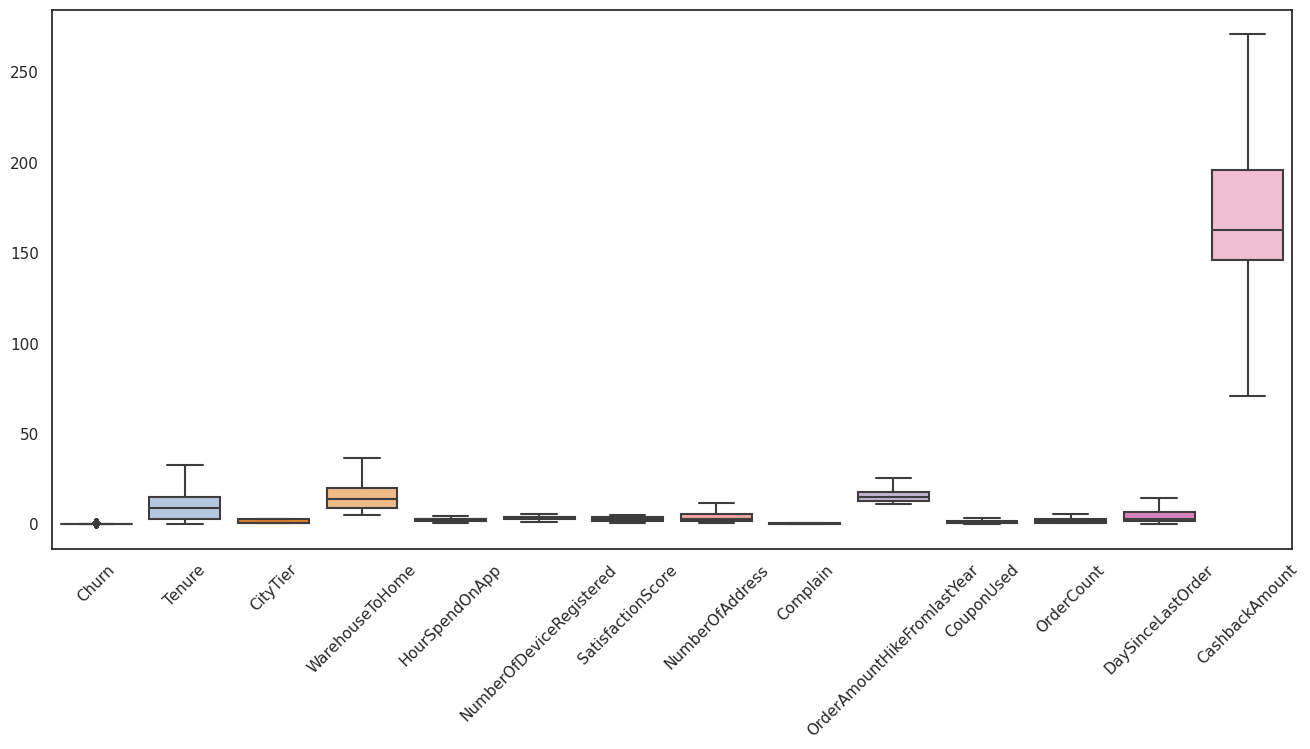

In [13]:
sns.set(style="white", palette="tab20")
fig, ax = plt.subplots(figsize=(16,7))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

###Categorical variables

In [14]:
#Categorical variables
for col in cat:
    print(df[col].value_counts())

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64
Male      3384
Female    2246
Name: Gender, dtype: int64
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64


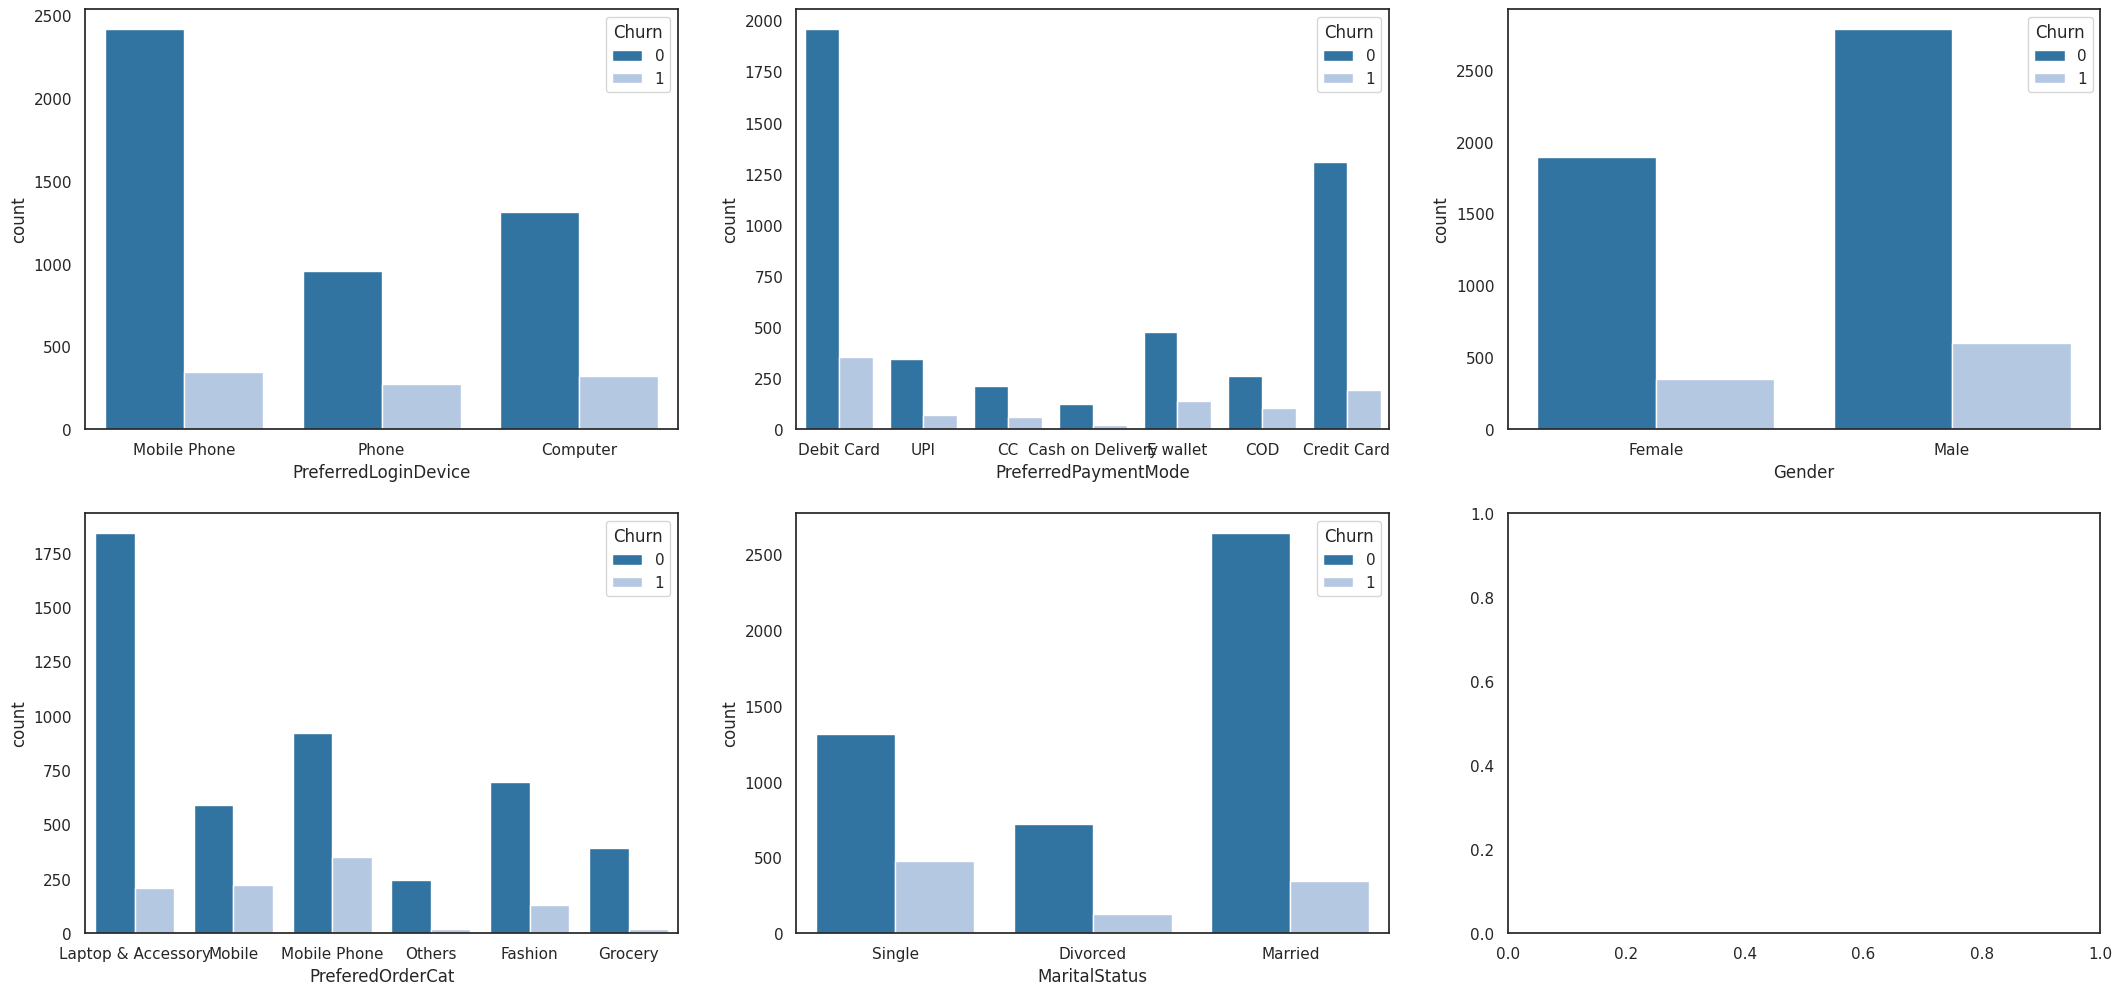

In [15]:
#visualise each variable with their corresponding churn value
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(26,12))
for col,subplot in zip(cat, ax.flatten()):
  sns.countplot(x = df[col], hue=df.Churn, ax=subplot)

### Numerical variable

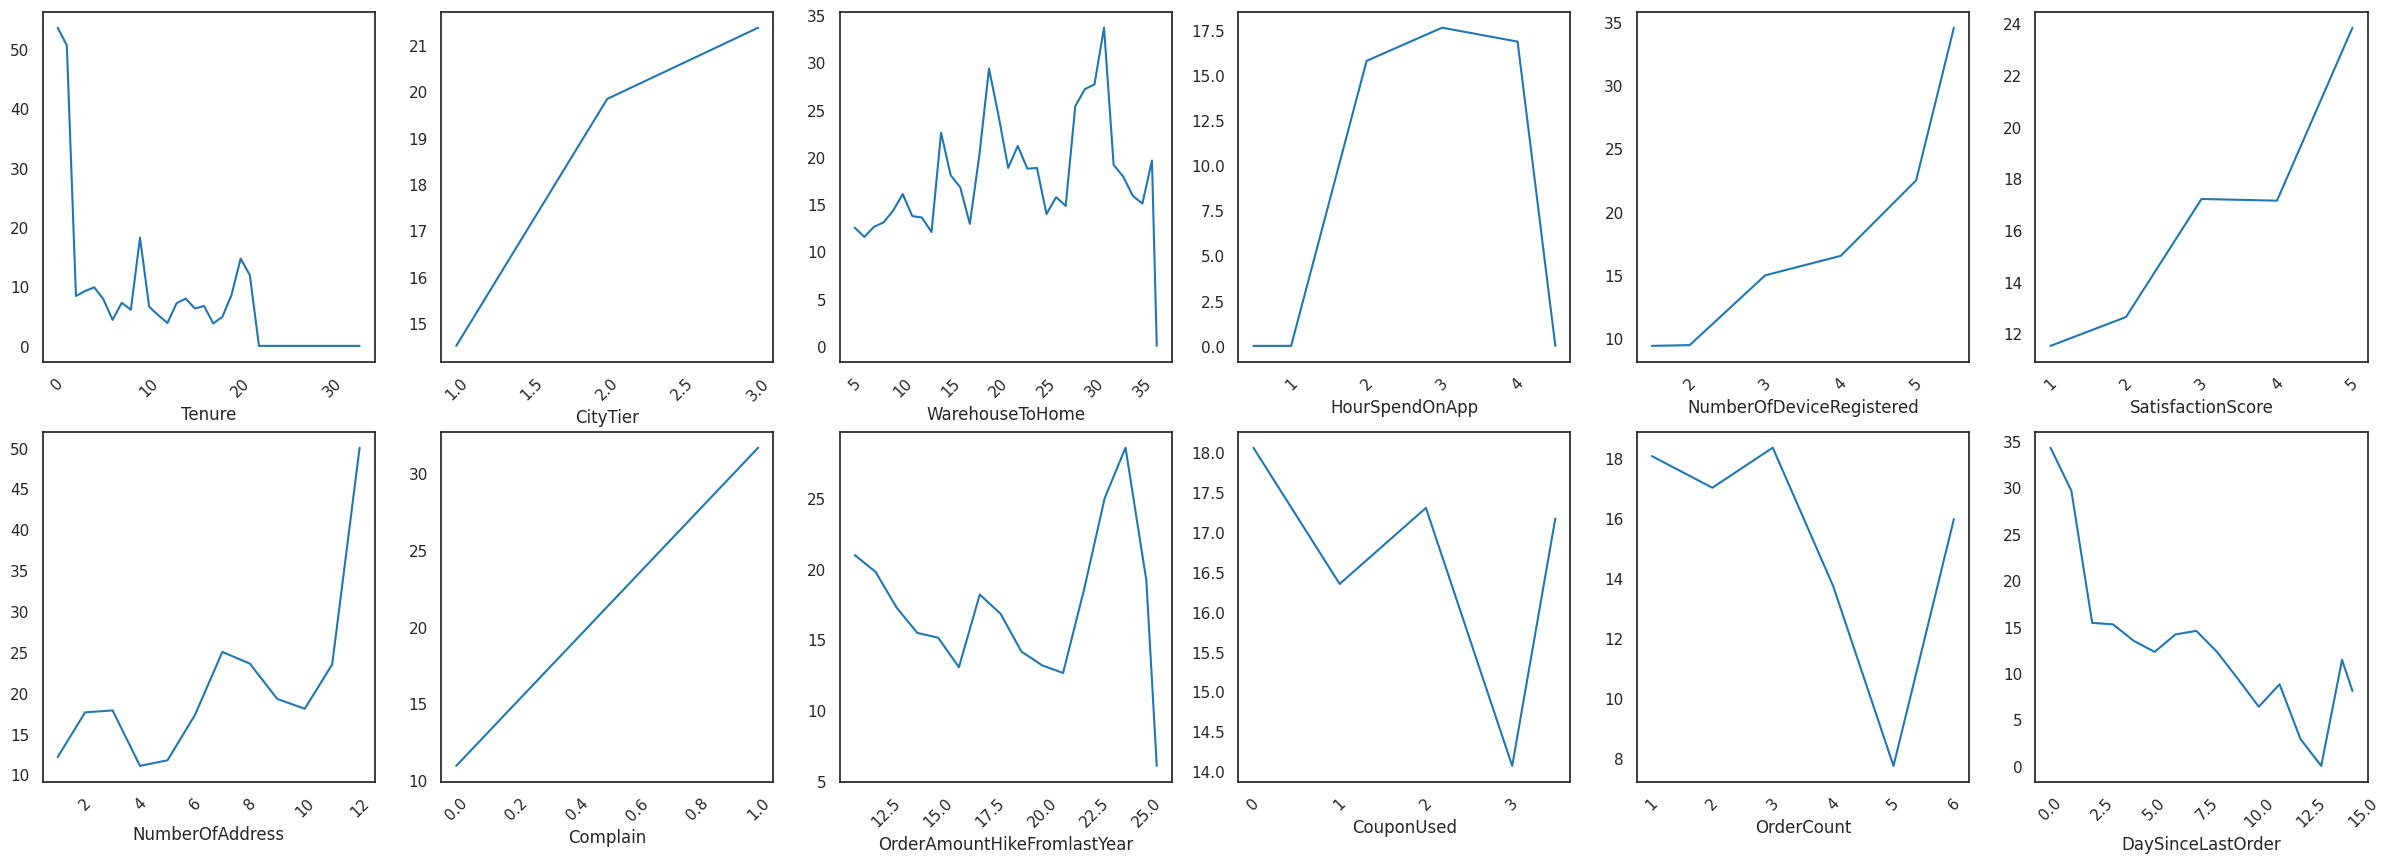

In [16]:
#Numerical variable
for i, subplot in zip(num, ax.flatten()):
    sns.histplot(df[i], kde = True, ax=subplot)

#percent churn for numerical variables
fig, ax = plt.subplots(2, 6, figsize=(30, 10))
for col,subplot in zip(num, ax.flatten()):
    temp = df.groupby(by=df[col]).Churn.sum()
    total = df.value_counts(col).sort_index()
    res1 = temp/total*100
    sns.lineplot(x = res1.index, y = res1.values, ax=subplot, )
    subplot.tick_params(axis='x',labelrotation=45)

<ipython-input-17-575c6e9d4e14>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(),cmap="rocket",annot=True,annot_kws={"size": 7.5},linewidths=.5)


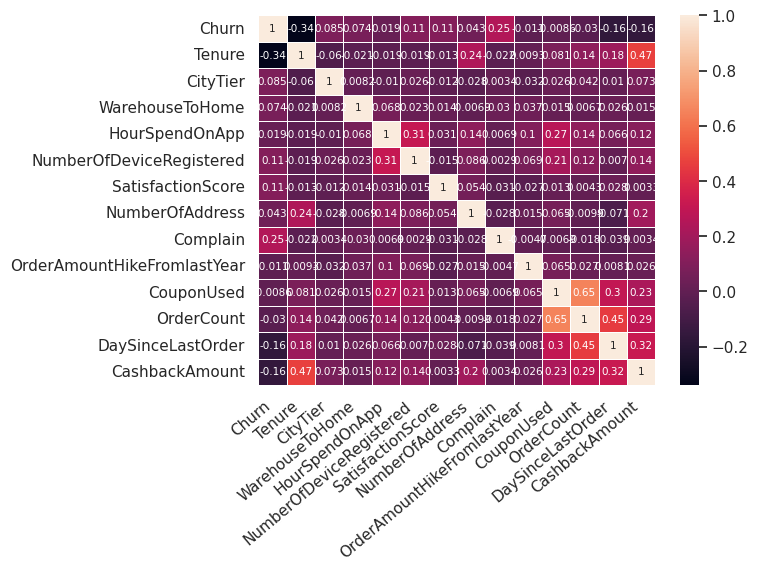

In [17]:
#Variable Churn correlation check
(df[['Churn']].corr())
ax = sns.heatmap(df.corr(),cmap="rocket",annot=True,annot_kws={"size": 7.5},linewidths=.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");


## Model Creation and Evaluation

In [18]:
# models
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV # for feature selection

In [19]:
# cate data prepration : one hot encode
## (PreferredLoginDevice, PreferredPaymentMode, Gender, PreferedOrderCat, MaritalStatus)
enc = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col]=enc.fit_transform(df[col])

In [20]:
# set the variable
X = df.drop(columns=['Churn'])
y = df['Churn']

In [21]:
# split - train test (stratified training -- การแบ่งโดยที่ ratio ของ y กะ x เท่าๆกันใน ทุก sample)
## ref: https://towardsdatascience.com/what-is-stratified-cross-validation-in-machine-learning-8844f3e7ae8e

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=42) ## random seed

In [22]:
#Create Generic function to fit data and display results/predictions

## for(loop) clf in clfs -- clfs =[..,..,..]

def fit_evaluate(clf, X_train, X_test, y_train, y_test):
    # fit model to training data
    clf.fit(X_train, y_train)

    # make predictions for train data (as a score ...)
    y_pred_train = clf.predict(X_train)

    # make predictions for test data (as a score)
    y_pred_test = clf.predict(X_test)

    # print evaluation
    print(classification_report(y_test, y_pred_test))
    print('\nConfusion Matrix: \n')
    s = sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='g', cmap='YlGnBu'); # annot -- ตัวเลข, fmt -- format
    s.set(xlabel='Predicted class', ylabel='True class')
    plt.show()

    # prep for ROC
    fpr_train, tpr_train, _ = roc_curve(y_pred_train,  y_train)
    auc_train = roc_auc_score(y_pred_train, y_train)
    plt.plot(fpr_train,tpr_train, color='Blue', label='train: auc='+f'{auc_train:.2f}') # .2f คือ ทศนิยม 2 ตน.

    fpr_test, tpr_test, _ = roc_curve(y_pred_test,  y_test)
    auc_test = roc_auc_score(y_pred_test, y_test)
    plt.plot(fpr_test,tpr_test, color='Red', label='test: auc='+f'{auc_test:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.legend(loc=4)
    plt.show()

##### XGBoots

** XGBoost Classifier ** 

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      3285
           1       0.82      0.68      0.74       656

    accuracy                           0.92      3941
   macro avg       0.88      0.83      0.85      3941
weighted avg       0.92      0.92      0.92      3941


Confusion Matrix: 



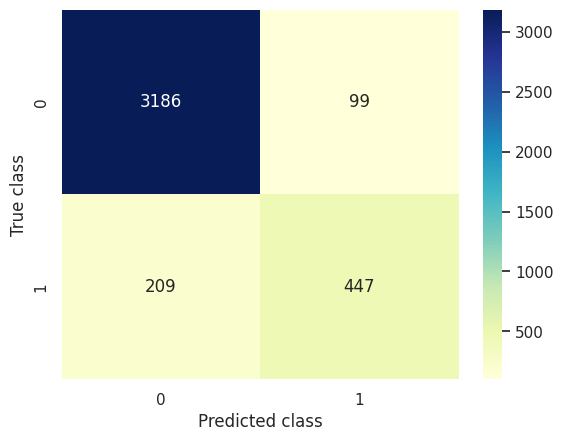

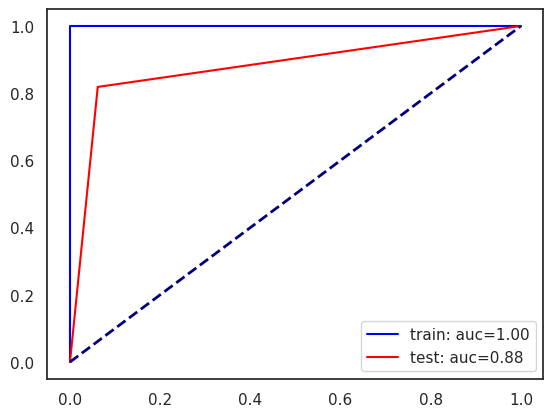

In [23]:
# XGBoots

import xgboost as xgb

## raw (none smote)
modelXGB = xgb.XGBClassifier(objective='binary:logistic', eval_metric="auc")
print('** XGBoost Classifier ** \n')
fit_evaluate(modelXGB, X_train, X_test, y_train, y_test)

Review more model with
- SMOTE data
- Undersampled data
- Oversampled data

In [24]:
## set up SMOTE models
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
sm.fit(X_train, y_train)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

## Undersampled data
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
rus.fit(X_train, y_train)
X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)

## Oversampled data
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
ros.fit(X_train, y_train)
X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)


* SMOTE and XGBoots * 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3285
           1       0.78      0.69      0.73       656

    accuracy                           0.92      3941
   macro avg       0.86      0.83      0.84      3941
weighted avg       0.91      0.92      0.91      3941


Confusion Matrix: 



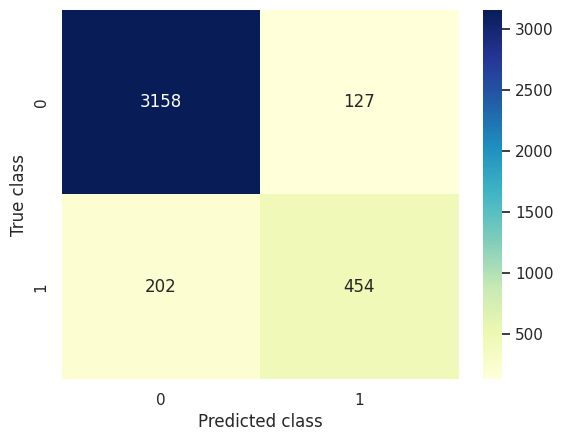

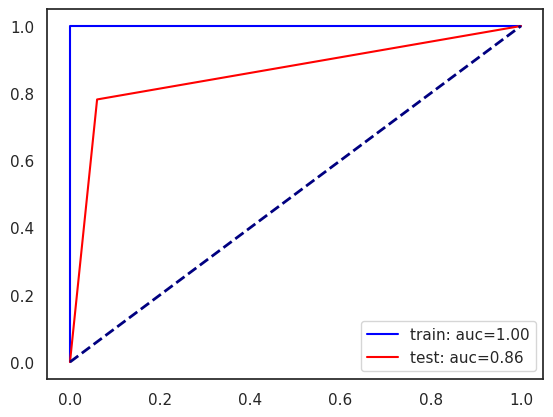

* Under and XGBoots * 

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      3285
           1       0.52      0.84      0.64       656

    accuracy                           0.84      3941
   macro avg       0.74      0.84      0.77      3941
weighted avg       0.89      0.84      0.86      3941


Confusion Matrix: 



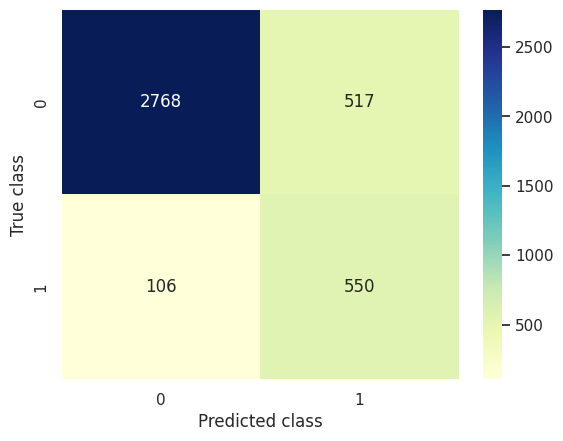

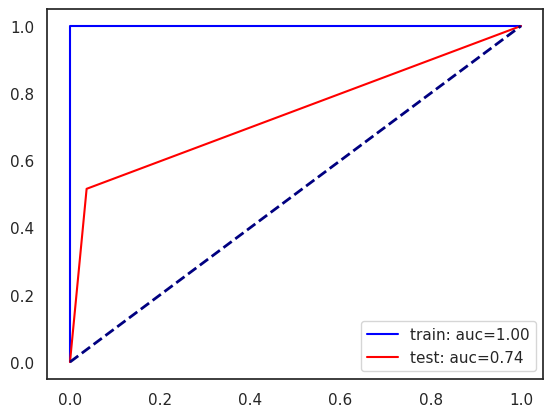

* Over and XGBoots * 

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3285
           1       0.80      0.72      0.76       656

    accuracy                           0.92      3941
   macro avg       0.87      0.84      0.86      3941
weighted avg       0.92      0.92      0.92      3941


Confusion Matrix: 



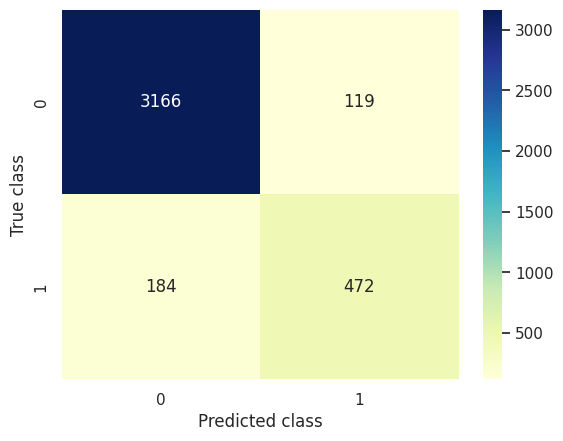

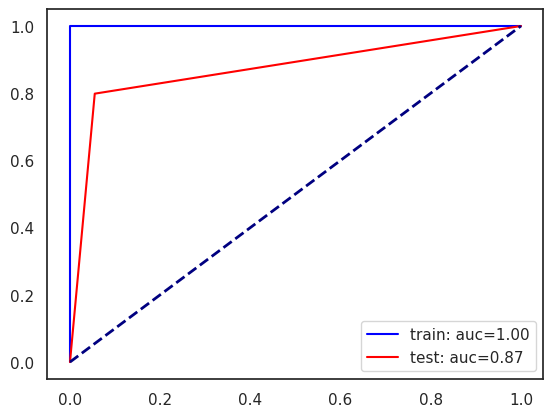

In [25]:
# XGBoots with resample data (SMOTE, Under, Over)
modelXGB = xgb.XGBClassifier(objective='binary:logistic', eval_metric="auc")

# SMOTE
print('* SMOTE and XGBoots * \n')
fit_evaluate(modelXGB, X_train_SMOTE, X_test, y_train_SMOTE, y_test)

# Under sampling
print('* Under and XGBoots * \n')
fit_evaluate(modelXGB, X_undersampled, X_test, y_undersampled, y_test)

# Over sampling
print('* Over and XGBoots * \n')
fit_evaluate(modelXGB, X_oversampled, X_test, y_oversampled, y_test)


### Shap for checking features explanation
- for checking feature that impact our model

  ref: https://github.com/slundberg/shap

In [26]:
pip install Cython

In [27]:
pip install shap

In [28]:
import shap
shap.initjs()

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [30]:
shap.initjs()# explain the LR model
masker = shap.maskers.Independent(data = X_test)
explainer = shap.Explainer(modelXGB, masker=masker)
shap_values = explainer(X_test)

 97%|=================== | 3804/3941 [00:23<00:00]       

In [31]:
print(X_test.shape)

(3941, 18)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


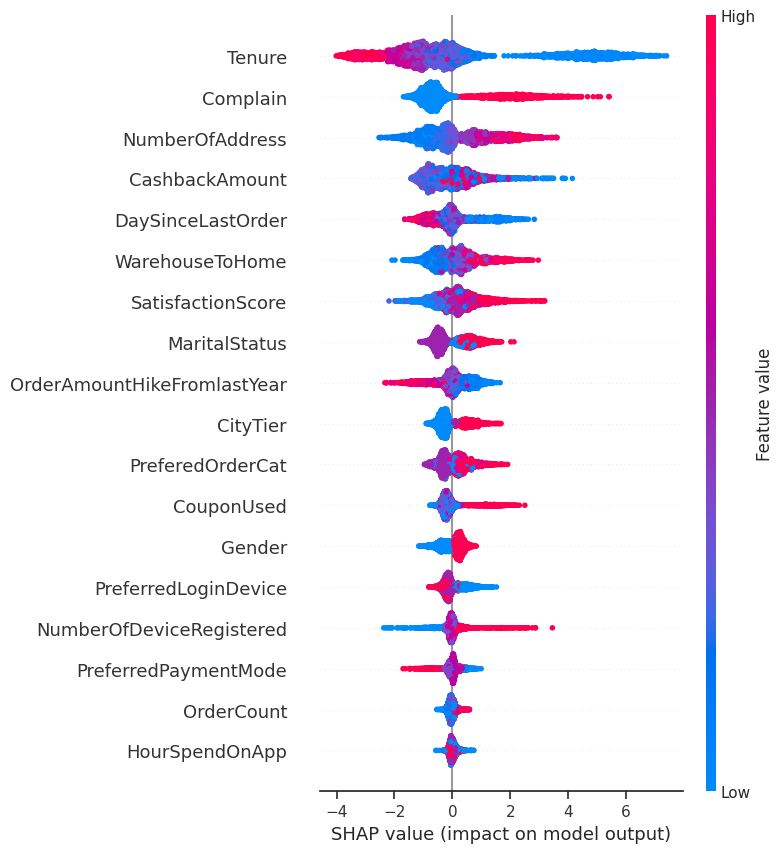

In [32]:
shap.summary_plot(shap_values)

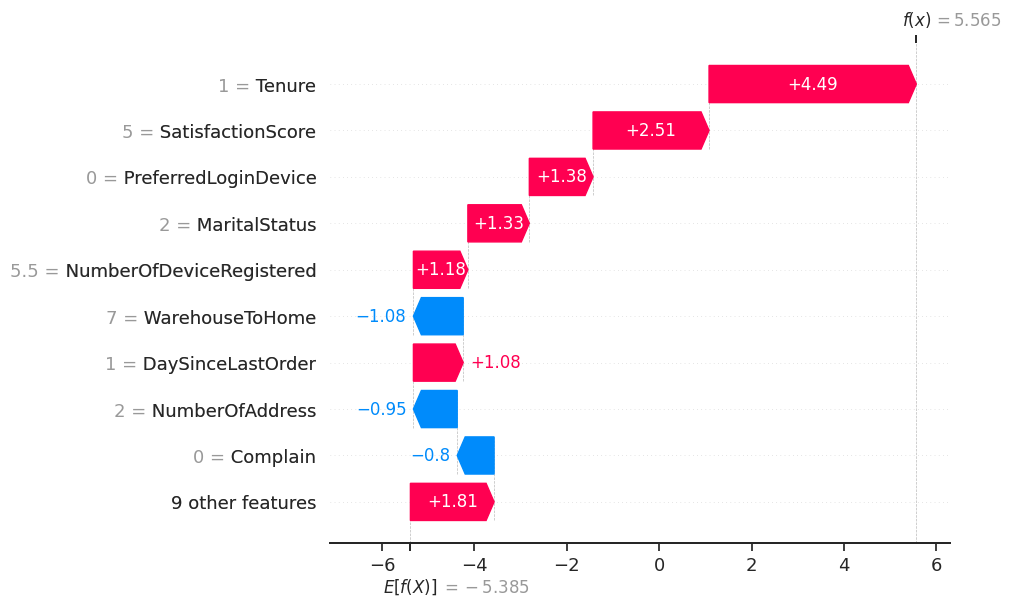

In [34]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

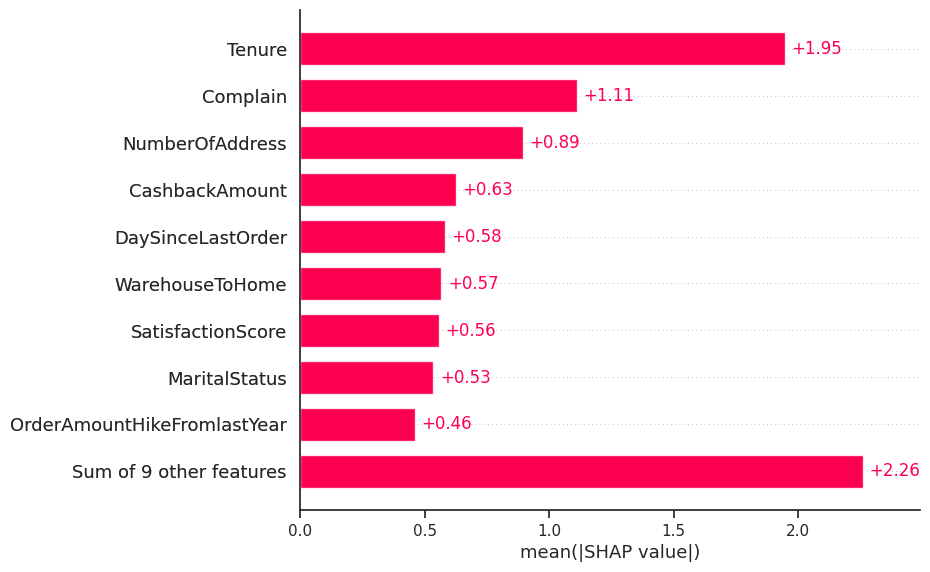

In [33]:
shap.plots.bar(shap_values)